# Financial Ratio Analysis

## Macroeconomic Environments Favorable for Fundamental Analysis Strategies

Fundamental analysis strategies thrive in macroeconomic environments characterized by stability and predictability. In such environments, analysts can more effectively evaluate a company's financial health and future prospects. Here are key macroeconomic conditions conducive to the success of fundamental analysis:

1. **Stable Growth**: Periods of steady economic growth provide a predictable backdrop for fundamental analysis. Companies experience consistent revenue and earnings growth, enabling analysts to forecast future performance based on factors such as earnings growth rates and industry trends.

2. **Low Inflation**: Low inflation environments reduce uncertainty about future costs and revenues for companies. Fundamental analysts can more accurately assess profitability and pricing strategies in such stable economic conditions.

3. **Low Interest Rates**: Companies benefit from low borrowing costs in environments with low interest rates. Fundamental analysis helps identify companies with manageable debt levels and strong cash flows that can capitalize on favorable lending conditions.

4. **Stable Monetary Policy**: Fundamental analysis thrives when central banks provide clear guidance on interest rates and inflation targets. Stable monetary policy reduces uncertainty for companies and investors, facilitating assessments of long-term prospects based on fundamental factors.

5. **Favorable Regulatory Environment**: Regulatory support for business growth and innovation creates opportunities for companies to thrive. Fundamental analysis assists investors in identifying companies well-positioned to benefit from supportive regulatory changes.

6. **Global Stability**: Geopolitical stability and minimal economic disruptions globally provide a conducive environment for fundamental analysis. Economic and political stability in key markets allow for reliable assessments of long-term prospects for individual stocks.

In contrast, fundamental analysis may face challenges in highly volatile or uncertain macroeconomic environments. Factors such as geopolitical tensions, currency fluctuations, and unexpected policy changes can complicate earnings forecasts and intrinsic value assessments.

----

In [12]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

----

## Function: download_financials

This function downloads financial statements data and OHLC (Open, High, Low, Close) data using the `yfinance` library, merges them, and returns a combined DataFrame.

### Parameters:
- `ticker` (str): The ticker symbol of the asset for which financial data is to be retrieved.
- `start_date` (str): The start date for fetching financial data in the format "YYYY-MM-DD".
- `end_date` (str): The end date for fetching financial data in the format "YYYY-MM-DD".

### Returns:
- `combined_data` (DataFrame): A DataFrame containing the combined financial statements data and OHLC data for the specified ticker.

### 1. Annual Statements for Last 4 Years

You can use the function `download_financials` to retrieve annual financial statements data for the last four years.

#### Considerations:
- **Comprehensive Overview**: Annual financial statements provide a comprehensive overview of a company's performance over a year.
- **Long-Term Trends**: Useful for identifying long-term trends and patterns in a company's financial performance.
- **Strategic Analysis**: Often used for strategic analysis and decision-making, such as evaluating investment opportunities.
- **Investment Horizon**: Suitable for investors with a long-term investment horizon.

### 2. Quarterly Statements for Last 5 Quarters

Alternatively, you can use the function `download_quarterly_financials` to retrieve quarterly financial statements data for the last five quarters. 

#### Considerations:
- **Timely Updates**: Quarterly financial statements offer more frequent updates on a company's financial performance.
- **Short-Term Analysis**: Valuable for short-term analysis and monitoring of recent performance trends.
- **Market Sentiment**: Can influence market sentiment and investor perception due to recent developments.
- **Risk Management**: Useful for assessing short-term risks and volatility.
- **Trading Strategies**: May be used by traders and active investors to identify short-term trading opportunities.

In [14]:
def download_financials(ticker, quarterly=False):
    """
    Downloads financial statements data and OHLC data using yfinance,
    merges them, and returns a combined DataFrame.

    Parameters:
    ticker (str): The ticker symbol of the asset for which financial data is to be retrieved.
    quarterly (bool): Specifies whether to retrieve quarterly financial statements data. Default is False (retrieve yearly data).

    Returns:
    combined_data (DataFrame): A DataFrame containing the combined financial statements data and OHLC data for the specified ticker.
    """
    # Determine date range based on quarterly parameter
    if quarterly:
        end_date = datetime.today().strftime("%Y-%m-%d")
        start_date = (datetime.today() - timedelta(days=1.25*365)).strftime("%Y-%m-%d") # Five quarters back
    else:
        end_date = datetime.today().strftime("%Y-%m-%d")
        start_date = (datetime.today() - timedelta(days=365*4)).strftime("%Y-%m-%d")

    # Download OHLC data using yfinance
    ohlc_data = yf.download(ticker, start=start_date, end=end_date)

    # Download financial statements data using yfinance
    if quarterly:
        financials_income = yf.Ticker(ticker).quarterly_income_stmt.transpose()[::-1]
        financials_balance_sheet = yf.Ticker(ticker).quarterly_balance_sheet.transpose()[::-1]
        financials_cashflow = yf.Ticker(ticker).quarterly_cashflow.transpose()[::-1]
    else:
        financials_income = yf.Ticker(ticker).financials.transpose()[::-1]
        financials_balance_sheet = yf.Ticker(ticker).balance_sheet.transpose()[::-1]
        financials_cashflow = yf.Ticker(ticker).cashflow.transpose()[::-1]

    # Merge the financial statements data into a single DataFrame
    financials = pd.concat([financials_income, financials_balance_sheet, financials_cashflow], axis=1)

    # Reset index to make Date accessible for merging
    financials.reset_index(inplace=True)
    financials.rename(columns={'index': 'Date'}, inplace=True)

    # Convert Date column to datetime
    financials['Date'] = pd.to_datetime(financials['Date'])

    # Merge datasets based on the Date column using nearest available adjusted close price
    combined_data = pd.merge_asof(financials, ohlc_data['Adj Close'], on='Date', direction='nearest')

    return combined_data

### Example 1: Data Merge Sanity Check Plot

This plot visually confirms the alignment of financial statement dates with corresponding adjusted close prices. It ensures the merging process was successful and that financial statements data is correctly paired with the nearest available adjusted close prices.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


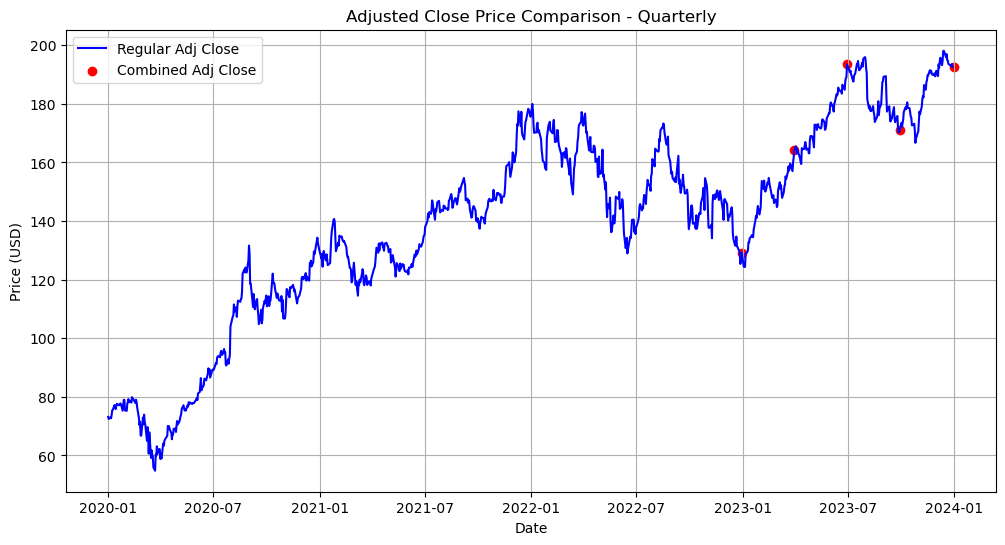

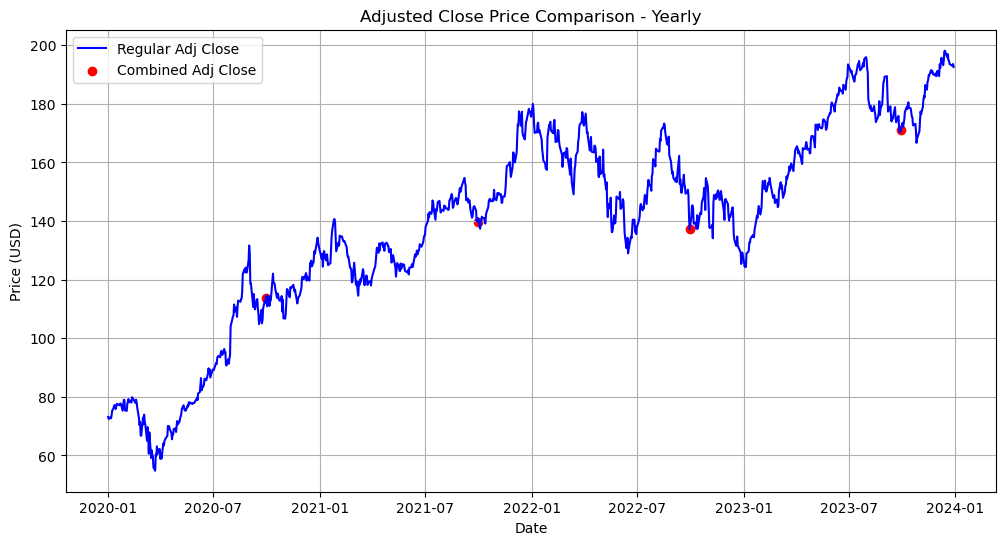

In [237]:
# Function to plot the combined alongside the regular adjusted close
def plot_combined_data_with_regular(adj_close, combined_adj_close, frequency):
    plt.figure(figsize=(12, 6))
    plt.plot(adj_close.index, adj_close, label='Regular Adj Close', color='blue')
    plt.scatter(combined_adj_close.index, combined_adj_close, label='Combined Adj Close', color='red')
    plt.title(f'Adjusted Close Price Comparison - {frequency}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Retrieve regular adjusted close data
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-01-01"
adj_close = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

# Retrieve combined data for both scenarios: quarterly and yearly
combined_data_quarterly = download_financials(ticker, quarterly=True)
combined_data_yearly = download_financials(ticker)

# Extract combined adjusted close data
combined_adj_close_quarterly = combined_data_quarterly.set_index('Date')['Adj Close']
combined_adj_close_yearly = combined_data_yearly.set_index('Date')['Adj Close']

# Plot combined adjusted close alongside regular adjusted close for both scenarios
plot_combined_data_with_regular(adj_close, combined_adj_close_quarterly, "Quarterly")
plot_combined_data_with_regular(adj_close, combined_adj_close_yearly, "Yearly")

----

### Understanding Financial Statement Structure

In this section, we print the first column of each financial statement without transposing the data. By doing so, users can easily examine the structure and names of the financial statement items. This allows users to choose specific data points for their analysis or gain insights into the composition of each financial statement.

In [129]:
# Define the ticker symbol
ticker = "AAPL"

# Download all financial statements data using yfinance
financials_income = yf.Ticker(ticker).financials
financials_balance_sheet = yf.Ticker(ticker).balance_sheet
financials_cashflow = yf.Ticker(ticker).cashflow

#### Income Statement

In [131]:
# Print the first column of each financial statement
print("Income Statement:")
print(financials_income.iloc[:, 0])  # Print the first column

Income Statement:
Tax Effect Of Unusual Items                                              0.0
Tax Rate For Calcs                                                     0.147
Normalized EBITDA                                             129188000000.0
Net Income From Continuing Operation Net Minority Interest     96995000000.0
Reconciled Depreciation                                        11519000000.0
Reconciled Cost Of Revenue                                    214137000000.0
EBITDA                                                        129188000000.0
EBIT                                                          117669000000.0
Net Interest Income                                             -183000000.0
Interest Expense                                                3933000000.0
Interest Income                                                 3750000000.0
Normalized Income                                              96995000000.0
Net Income From Continuing And Discontinued Operation     

#### Balance Sheet

In [110]:
pd.set_option('display.max_rows', None)
print("\nBalance Sheet:")
print(financials_balance_sheet.iloc[:, 0])  # Print the first column


Balance Sheet:
Treasury Shares Number                                            0.0
Ordinary Shares Number                                  15550061000.0
Share Issued                                            15550061000.0
Net Debt                                                81123000000.0
Total Debt                                             111088000000.0
Tangible Book Value                                     62146000000.0
Invested Capital                                       173234000000.0
Working Capital                                         -1742000000.0
Net Tangible Assets                                     62146000000.0
Common Stock Equity                                     62146000000.0
Total Capitalization                                   157427000000.0
Total Equity Gross Minority Interest                    62146000000.0
Stockholders Equity                                     62146000000.0
Gains Losses Not Affecting Retained Earnings           -11452000000.0
Othe

#### Cash Flow Statement

In [108]:
print("\nCash Flow Statement:")
print(financials_cashflow.iloc[:, 0])  # Print the first column


Cash Flow Statement:
Free Cash Flow                                     99584000000.0
Repurchase Of Capital Stock                       -77550000000.0
Repayment Of Debt                                 -11151000000.0
Issuance Of Debt                                    5228000000.0
Issuance Of Capital Stock                                    NaN
Capital Expenditure                               -10959000000.0
Interest Paid Supplemental Data                     3803000000.0
Income Tax Paid Supplemental Data                  18679000000.0
End Cash Position                                  30737000000.0
Beginning Cash Position                            24977000000.0
Changes In Cash                                     5760000000.0
Financing Cash Flow                              -108488000000.0
Cash Flow From Continuing Financing Activities   -108488000000.0
Net Other Financing Charges                        -6012000000.0
Cash Dividends Paid                               -15025000000.0
Com

----

## Ratio Analysis in Financial Statement Analysis

Ratio analysis plays a crucial role in financial statement analysis, providing valuable insights into various aspects of a company's financial performance and position. Here are key ratios commonly analyzed by analysts:

### 1. Profitability Ratios

- **Gross Profit Margin**: Indicates the percentage of revenue that exceeds the cost of goods sold, reflecting the efficiency of the company's production process. A higher gross profit margin indicates better efficiency in managing production costs.

- **Operating Profit Margin**: Measures the percentage of revenue that remains after deducting operating expenses, showing the company's operational efficiency in generating profits. A higher operating profit margin suggests effective cost management and pricing strategies.

- **Net Profit Margin**: Represents the percentage of revenue that remains as net profit after all expenses, indicating the company's overall profitability. A higher net profit margin implies better control over expenses and higher profitability.

- **Return on Assets (ROA)**: Measures the profitability of assets by indicating the percentage of net income generated relative to total assets. A higher ROA indicates better utilization of assets to generate profits.

- **Return on Equity (ROE)**: Indicates the profitability of shareholder equity by showing the percentage of net income generated relative to shareholder equity. A higher ROE suggests efficient utilization of shareholder funds to generate profits.

- **Earnings per Share (EPS)**: Represents the portion of a company's profit allocated to each outstanding share of common stock. Higher EPS indicates better profitability on a per-share basis, potentially attracting investors.

### 2. Liquidity Ratios

- **Current Ratio**: Indicates the company's ability to cover short-term liabilities with its short-term assets. A higher current ratio suggests better liquidity and ability to meet short-term obligations.

- **Quick Ratio (Acid-Test Ratio)**: Measures the company's ability to cover immediate short-term liabilities with its most liquid assets. A higher quick ratio indicates a stronger ability to meet short-term obligations without relying on inventory sales.

- **Cash Ratio**: Measures the company's ability to cover immediate short-term liabilities with its cash and cash equivalents. A higher cash ratio implies a stronger ability to cover immediate obligations without relying on other assets.

### 3. Solvency Ratios

- **Debt to Equity Ratio**: Indicates the proportion of debt used to finance the company's assets relative to shareholders' equity. A lower debt-to-equity ratio suggests lower financial risk and a stronger financial position.

- **Debt Ratio**: Represents the percentage of assets financed with debt. A lower debt ratio indicates lower financial leverage and potentially lower financial risk.
- **Interest Coverage Ratio**: Measures the company's ability to pay interest expenses on outstanding debt. A higher interest coverage ratio indicates better ability to meet interest obligations from operating profits.

- **Debt Service Coverage Ratio**: Indicates the company's ability to cover debt obligations from its operating income. A higher debt service coverage ratio suggests better ability to meet debt obligations from operating cash flow.

### 4. Efficiency Ratios

- **Inventory Turnover**: Measures how efficiently inventory is managed by indicating the number of times inventory is sold and replaced. A higher inventory turnover ratio suggests efficient inventory management and faster conversion of inventory into sales.

- **Accounts Receivable Turnover**: Indicates how efficiently a company collects payments from customers. A higher accounts receivable turnover ratio suggests efficient credit management and timely collection of receivables.

- **Accounts Payable Turnover**: Measures how efficiently a company pays its suppliers. A higher accounts payable turnover ratio indicates efficient payment management and potentially favorable credit terms with suppliers.

- **Asset Turnover**: Indicates how efficiently a company uses its assets to generate revenue. A higher asset turnover ratio suggests better asset utilization and revenue generation.

### 5. Growth Ratios

- **Revenue Growth Rate**: Represents the percentage increase or decrease in revenue over a period, reflecting the company's ability to expand its top line. Higher revenue growth rates indicate stronger market demand or effective business strategies.

- **Earnings Growth Rate**: Indicates the percentage increase or decrease in earnings over a period, reflecting the company's ability to increase profitability. Higher earnings growth rates indicate improved operational efficiency or successful cost management strategies.

### 6. Price Ratios

- **Price-to-Earnings (P/E) Ratio**: The P/E ratio measures the current market price of a company's stock relative to its earnings per share (EPS). A higher P/E ratio indicates that investors are willing to pay more for each dollar of earnings, suggesting optimism about the company's future prospects. However, a very high P/E ratio may also indicate overvaluation.

- **Price-to-Book (P/B) Ratio**: The P/B ratio compares the market price of a company's stock to its book value per share. It indicates whether the stock is undervalued or overvalued relative to its book value. A P/B ratio below 1 may suggest that the stock is undervalued.

- **Price-to-Sales (P/S) Ratio**: The P/S ratio measures the company's market capitalization relative to its total revenue. It provides insight into how the market values the company's revenue. A lower P/S ratio may indicate that the stock is undervalued relative to its revenue.

> **Note:** When calculating these ratios, we use Diluted EPS as a more conservative measure of earnings per share. Diluted EPS takes into account the potential dilution from all potentially dilutive securities, such as stock options and convertible bonds. By assuming the conversion of all potentially dilutive securities, diluted EPS provides a more conservative estimate of earnings per share, which can be useful for assessing the company's financial health and performance under different scenarios.

Analyzing these ratios provides valuable insights into a company's financial health, performance, and operational efficiency, facilitating informed decision-making by investors and stakeholders.


In [16]:
class RatioAnalysis:
    def __init__(self, financial_data):
        """
        Initialize RatioAnalysis class with financial data.
        
        Parameters:
        - financial_data: Pandas DataFrame containing financial data.
        """        
        self.financial_data = financial_data
        self.profitability_ratios = None
        self.liquidity_ratios = None
        self.solvency_ratios = None
        self.efficiency_ratios = None
        self.growth_ratios = None
        self.price_ratios = None
    
    def calculate_profitability_ratios(self):
        """
        Calculate profitability ratios and store them in the profitability_ratios attribute.
        """
        self.profitability_ratios = pd.DataFrame()

        # 1. Gross Profit Margin
        self.profitability_ratios['Gross Profit Margin'] = (self.financial_data['Gross Profit'] / self.financial_data['Total Revenue']) * 100

        # 2. Operating Profit Margin
        self.profitability_ratios['Operating Profit Margin'] = (self.financial_data['Operating Income'] / self.financial_data['Total Revenue']) * 100

        # 3. Net Profit Margin
        self.profitability_ratios['Net Profit Margin'] = (self.financial_data['Net Income'] / self.financial_data['Total Revenue']) * 100

        # 4. Return on Assets (ROA)
        self.profitability_ratios['ROA'] = (self.financial_data['Net Income'] / self.financial_data['Total Assets']) * 100

        # 5. Calculate Return on Equity (ROE)
        self.profitability_ratios['ROE'] = (self.financial_data['Net Income'] / self.financial_data['Stockholders Equity']) * 100

        # 6. Earnings per Share (EPS)
        self.profitability_ratios['EPS'] = self.financial_data['Net Income'] / self.financial_data['Share Issued']

    def calculate_liquidity_ratios(self):
        """
        Calculate liquidity ratios and store them in the liquidity_ratios attribute.
        """        
        self.liquidity_ratios = pd.DataFrame()

        # Calculate liquidity ratios and add them to the ratios DataFrame
        # Liquidity Analysis

        # 1. Current Ratio: Measures the company's ability to cover short-term liabilities with its short-term assets.
        self.liquidity_ratios['Current Ratio'] = self.financial_data['Current Assets'] / self.financial_data['Current Liabilities']

        # 2. Quick Ratio (Acid-Test Ratio): Measures the company's ability to cover immediate short-term liabilities with its most liquid assets.
        self.liquidity_ratios['Quick Ratio'] = (self.financial_data['Current Assets'] - self.financial_data['Inventory']) / self.financial_data['Current Liabilities']

        # 3. Cash Ratio: Measures the company's ability to cover immediate short-term liabilities with its cash and cash equivalents.
        self.liquidity_ratios['Cash Ratio'] = self.financial_data['Cash And Cash Equivalents'] / self.financial_data['Current Liabilities']

    def calculate_solvency_ratios(self):
        """
        Calculate solvency ratios and store them in the solvency ratios attribute.
        """
        self.solvency_ratios = pd.DataFrame()

        # 1. Debt to Equity Ratio
        self.solvency_ratios['Debt to Equity Ratio'] = self.financial_data['Total Debt'] / self.financial_data['Stockholders Equity']

        # 2. Debt Ratio
        self.solvency_ratios['Debt Ratio'] = self.financial_data['Total Debt'] / self.financial_data['Total Assets']

        # 3. Interest Coverage Ratio
        self.solvency_ratios['Interest Coverage Ratio'] = self.financial_data['Operating Income'] / self.financial_data['Interest Expense']

        # 4. Debt Service Coverage Ratio
        self.solvency_ratios['Debt Service Coverage Ratio'] = (self.financial_data['Net Income'] + self.financial_data['Interest Expense'] + self.financial_data['Tax Provision']) / self.financial_data['Total Debt']

    def calculate_efficiency_ratios(self):
        """
        Calculate efficiency ratios and add them to the ratios DataFrame.
        """
        self.efficiency_ratios = pd.DataFrame()

        # 1. Inventory Turnover
        self.efficiency_ratios['Inventory Turnover'] = self.financial_data['Cost Of Revenue'] / self.financial_data['Inventory']

        # 2. Accounts Receivable Turnover
        self.efficiency_ratios['Accounts Receivable Turnover'] = self.financial_data['Total Revenue'] / self.financial_data['Accounts Receivable']

        # 3. Accounts Payable Turnover
        self.efficiency_ratios['Accounts Payable Turnover'] = self.financial_data['Cost Of Revenue'] / self.financial_data['Accounts Payable']

        # 4. Asset Turnover
        self.efficiency_ratios['Asset Turnover'] = self.financial_data['Total Revenue'] / self.financial_data['Total Assets']


    def calculate_growth_ratios(self):
        """
        Calculate growth ratios and add them to the ratios DataFrame.
        """
        self.growth_ratios = pd.DataFrame()

        # 1. Revenue Growth Rate
        self.growth_ratios['Revenue Growth Rate'] = (self.financial_data['Total Revenue'] - self.financial_data['Total Revenue'].shift(1)) / self.financial_data['Total Revenue'].shift(1) * 100

        # 2. Earnings Growth Rate
        self.growth_ratios['Earnings Growth Rate'] = (self.financial_data['Net Income'] - self.financial_data['Net Income'].shift(1)) / self.financial_data['Net Income'].shift(1) * 100
        
    def calculate_price_ratios(self):
        """
        Calculate price-related ratios and store them in the price_ratios attribute.
        """
        self.price_ratios = pd.DataFrame()

        # Calculate price-related ratios
        # Price Analysis

        # 1. Price-to-Earnings (P/E) Ratio
        self.price_ratios['P/E Ratio'] = self.financial_data['Adj Close'] / self.financial_data['Diluted EPS']

        # 2. Price-to-Book (P/B) Ratio
        self.price_ratios['P/B Ratio'] = self.financial_data['Adj Close'] / (self.financial_data['Stockholders Equity'] / self.financial_data['Share Issued'])

        # 3. Price-to-Sales (P/S) Ratio
        self.price_ratios['P/S Ratio'] = self.financial_data['Adj Close'] / (self.financial_data['Total Revenue'] / self.financial_data['Share Issued'])
        
    def perform_ratio_analysis(self):
        # Perform analysis and calculate various ratios
        # Assign the analysis results to the respective attributes
        self.calculate_profitability_ratios()
        self.calculate_liquidity_ratios()
        self.calculate_solvency_ratios()
        self.calculate_efficiency_ratios()
        self.calculate_growth_ratios()
        self.calculate_price_ratios()

### Example 2: Performing Ratio Analysis on Apple

- Employ a for loop to iterate through multiple tickers since yfinance doesn't support passing a list directly into the download_financials function.

In [29]:
# Download financial data for the current ticker
financial_data = download_financials("AAPL")
        
# Create RatioAnalysis object and perform analysis
analysis = RatioAnalysis(financial_data)
analysis.perform_ratio_analysis()
# Print the results
print(financial_data)
print(financial_data.index)

# Print the results for each category of ratios
print("Profitability Ratios:")
print(analysis.profitability_ratios)

print("\nLiquidity Ratios:")
print(analysis.liquidity_ratios)

print("\nSolvency Ratios:")
print(analysis.solvency_ratios)

print("\nEfficiency Ratios:")
print(analysis.efficiency_ratios)

print("\nGrowth Ratios:")
print(analysis.growth_ratios)

print("\nPrice Ratios:")
print(analysis.price_ratios)

[*********************100%%**********************]  1 of 1 completed

        Date Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
0 2020-09-30                         0.0              0.144     81020000000.0   
1 2021-09-30                         0.0              0.133    123136000000.0   
2 2022-09-30                         0.0              0.162    133138000000.0   
3 2023-09-30                         0.0              0.147    129188000000.0   

  Net Income From Continuing Operation Net Minority Interest  \
0                                      57411000000.0           
1                                      94680000000.0           
2                                      99803000000.0           
3                                      96995000000.0           

  Reconciled Depreciation Reconciled Cost Of Revenue          EBITDA  \
0           11056000000.0             169559000000.0   81020000000.0   
1           11284000000.0             212981000000.0  123136000000.0   
2           11104000000.0             223546000000.0  133

# Fine Points and Adjustments in Financial Statement Analysis

Financial statement analysis (FSA) involves considering various technical points and making adjustments to ensure accurate and meaningful analysis. Analysts must pay attention to these finer points to gain deeper insights into a company's financial health. Here are some key adjustments and considerations:

## 1. Adjusting for Goodwill and Intangible Assets

- **Goodwill and intangible assets** such as patents, trademarks, and copyrights are often recorded on the balance sheet at historical cost.
- Analysts may adjust reported asset values by subtracting goodwill and certain intangible assets to reflect their true economic value.
- Some intangible assets, like internally developed patents or brands, may not be recorded on the balance sheet and require estimation or disclosure analysis.

## 2. Deferred Tax Adjustments

- **Deferred tax assets and liabilities** arise from temporary differences between accounting and tax rules.
- Analysts adjust reported financial figures to account for deferred tax assets or liabilities that impact a company's financial position or performance.
- For example, adjustments may be made to reflect tax benefits from deferred tax assets like tax-loss carry-forwards.

## 3. Capitalization vs. Expense

- Analysts evaluate whether certain expenses should be **capitalized** (recorded as assets) or **expensed** (recorded as expenses in the current period).
- Costs incurred to develop new products or technologies may be capitalized if they are expected to generate future economic benefits. Routine maintenance expenses are typically expensed as incurred.

## 4. Off-Balance Sheet Items

- **Off-balance sheet items** refer to financial obligations or assets not recorded on the balance sheet but may impact a company's financial position or performance.
- Analysts identify and assess off-balance sheet items like operating leases, contingent liabilities, and special purpose entities to understand true financial obligations and risks.

## 5. Pro Forma Adjustments

- **Pro forma adjustments** involve making hypothetical adjustments to financial statements to reflect potential changes in accounting policies, restructuring activities, or extraordinary events.
- Analysts may use pro forma financial statements to assess the impact of such adjustments on financial performance and position.

## 6. Non-Recurring Items

- Analysts exclude **non-recurring or one-time items** from financial analysis to obtain a clearer picture of a company's ongoing operations.
- Examples include restructuring charges, gains or losses from asset sales, and litigation settlements.

## 7. Consistency and Comparability

- Analysts ensure **consistency and comparability** in financial analysis by using standardized methods and adjusting for accounting differences across companies or reporting periods.
- Adjustments may be necessary to normalize financial statements and facilitate meaningful comparisons.

Paying attention to these finer points and making necessary adjustments is crucial for conducting accurate and insightful financial statement analysis, enabling informed investment decisions.